In [8]:
from moldy.validation.prediction.prediction_validation import PredictionValidation
from moldy.case_studies.baloo_left_hw.learnedModel_baloo_hw import LearnedModel_BalooHW

# from moldy.case_studies.baloo_left_hw.learnedModel_baloo_hw_pressures import LearnedModel_BalooHW

# data_path = "/home/daniel/catkin_ws/src/moldy/case_studies/baloo_left_hw/data/train_input.npy"
# data_path = "/home/daniel/catkin_ws/src/moldy/case_studies/baloo_left_hw/data/not_smooth_test_pressures.npy"
data_path ="/home/daniel/catkin_ws/src/moldy/case_studies/baloo_left_hw/data/gooddata/gooddata/validation_inputdata.npy"

ground_truth = LearnedModel_BalooHW(trial_dir="/home/daniel/catkin_ws/src/moldy/case_studies/baloo_left_hw/results/run_logs/SIM Model")

pred_tester = PredictionValidation(LearnedModel_BalooHW, 3500, ground_truth, states_of_interest=list(range(18, 24)), data_path=data_path, data_start_location=25000)
pred_tester.run_trials(
                "/home/daniel/catkin_ws/src/moldy/case_studies/baloo_left_hw/results/run_logs/",
                  # "/home/daniel/catkin_ws/src/moldy/case_studies/baloo_sim/results/best_models/",
                  "/home/daniel/catkin_ws/src/moldy/case_studies/baloo_left_hw/results/test_results/",
                  "xfer_to_smooth_prev_models")

# [18, 19, 20, 21, 22, 23]

In [2]:
pred_tester = tester

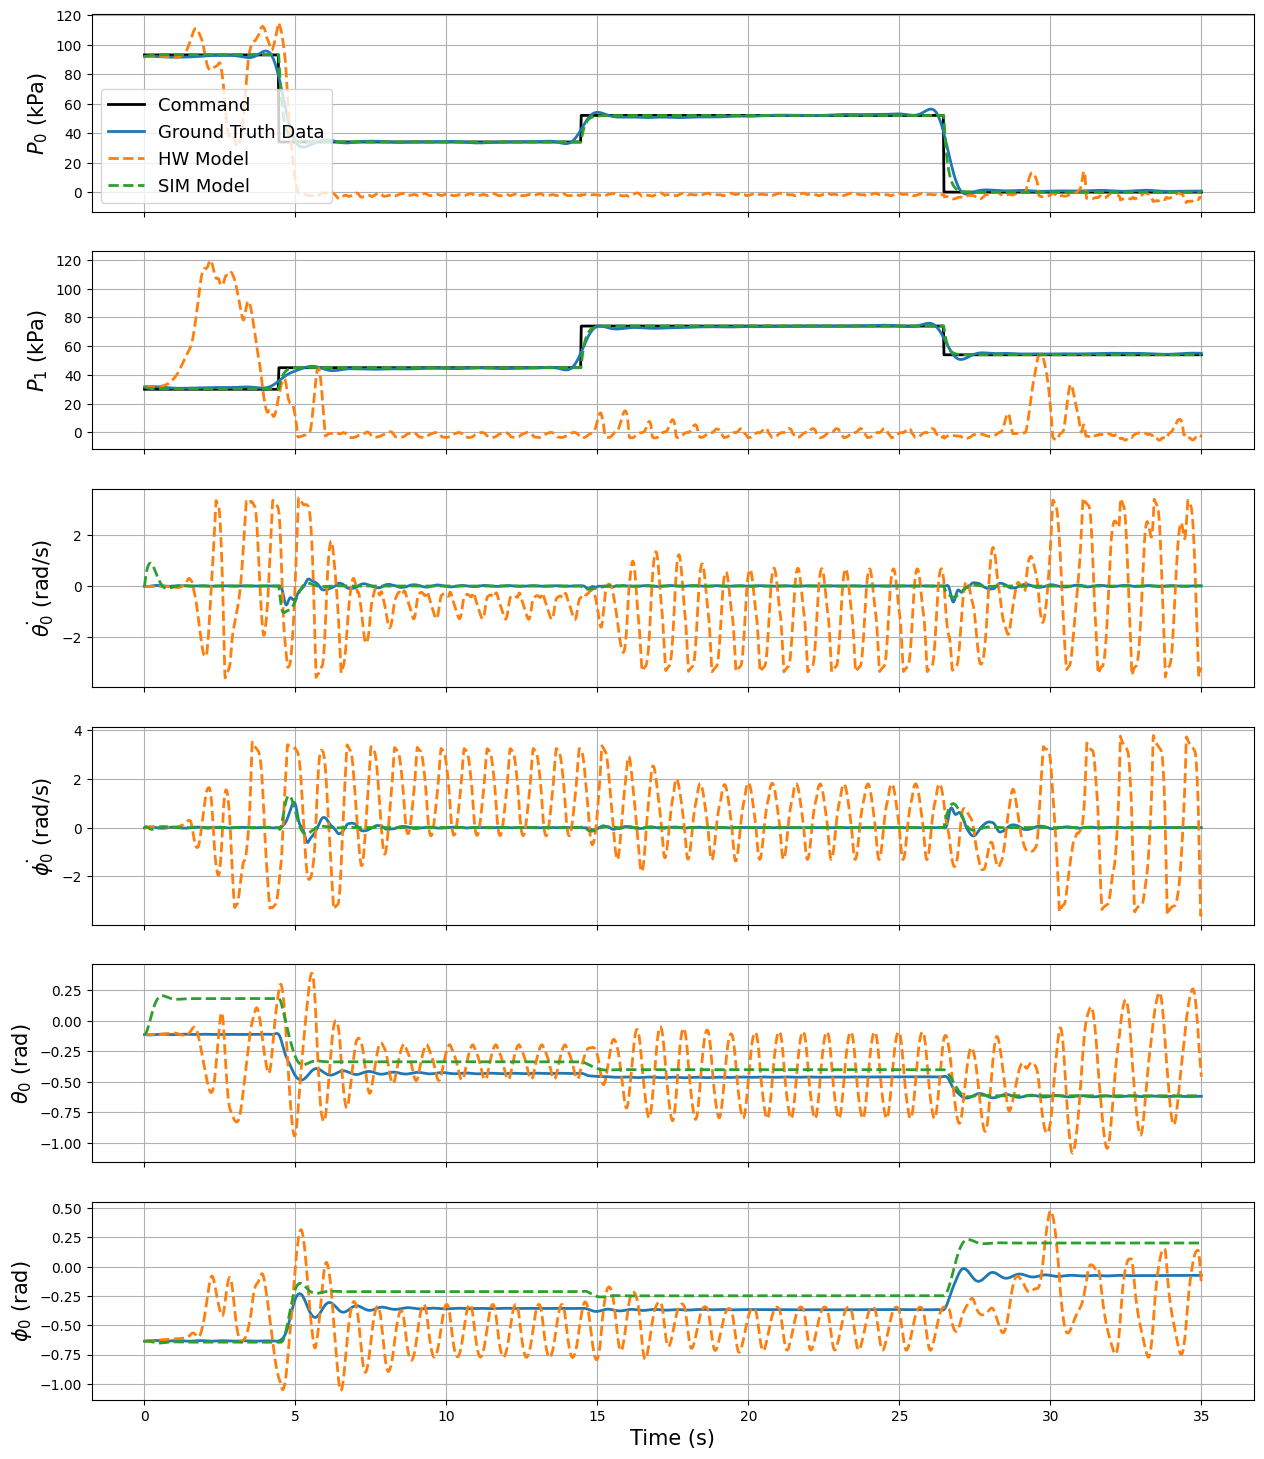

In [9]:
import matplotlib.pyplot as plt
import numpy as np
# state_labels = ["$\\theta_0$", "$\\phi_0$", "\\$theta_1$", "\\$phi_1$", "$\\theta_2$", "$\\phi_2$"]
# plot_prediction_performance(tester.results, [18, 19, 20, 21, 22, 23], 
#                             state_labels,
#                             "/home/daniel/catkin_ws/src/moldy/figure_generation/generated_figures/baloo_left_arm_joint_prediction.png")
state_labels = ["$P_0$ (kPa)", "$P_1$ (kPa)", "$\\dot{\\theta_0}$ (rad/s)", "$\\dot{\\phi_0}$ (rad/s)", "$\\theta_0$ (rad)", "$\\phi_0$ (rad)"]
states_of_interest = [0, 1, 12, 13, 18, 19]
ground_truth_data = pred_tester.results["ground_truth"]
pred_tester.results.pop("ground_truth")

plt.rc('pdf',fonttype = 42)
plt.rc('axes', labelsize=15)

fig, axs = plt.subplots(len(states_of_interest), 1, figsize=(15, len(states_of_interest)*3), sharex=True)

timestep = np.linspace(0, pred_tester.results[list(pred_tester.results.keys())[0]]["learned_predictions"].shape[0]//100, pred_tester.results[list(pred_tester.results.keys())[0]]["learned_predictions"].shape[0])

for i in range(len(states_of_interest)):
    if states_of_interest[i] < 12:
        axs[i].plot(timestep, ground_truth_data[:, i+24], "-k", label="Command", linewidth=2.0)
    axs[i].plot(timestep, ground_truth_data[:, states_of_interest[i]], label="Ground Truth Data", linewidth=2.0)

    for key in sorted(pred_tester.results.keys()):
        # if key.split("/")[-1][:4] == "250K":
        #     continue
        axs[i].plot(timestep, pred_tester.results[key]["learned_predictions"][:, states_of_interest[i]], "--", label=key.split("/")[-1], linewidth=2.0) #, c="tab:orange")
# 
    # axs[i].plot(timestep, pred_tester.results[list(pred_tester.results.keys())[0]]["learned_predictions"][:, states_of_interest[i]], "--", c="tab:orange", label="Model Prediction", linewidth=2.0)
    axs[i].grid()
    axs[i].set_ylabel(state_labels[i])

axs[-1].set_xlabel("Time (s)")
axs[0].legend(loc="lower left", fontsize=13)
# fig.legend(*axs[0].get_legend_handles_labels(),
#             loc='upper center', ncol=6, fontsize=15)

pred_tester.results["ground_truth"] = ground_truth_data

plt.savefig("/home/daniel/catkin_ws/src/moldy/figure_generation/generated_figures/baloo_sim_hw_predicting_baloo_hw.pdf", bbox_inches="tight")